<h1>Cuaderno de notas TP1 laboratorio de Datos</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from inline_sql import sql, sql_val

<h2>Importamos las tablas de datos</h2>

In [2]:
direccion = './TablasOriginales/'
df_sedes_completo = pd.read_csv(direccion + 'lista-sedes-datos.csv', on_bad_lines="warn")
# se agrega on_bad_lines, pues hay un error en la linea 16 del csv, con esto se logra ignorarla
df_sedes = pd.read_csv(direccion + 'lista-sedes.csv')
df_secciones = pd.read_csv(direccion + 'lista-secciones.csv')
archivo_inversiones = 'flujos-monetarios-netos-inversion-extranjera-directa.csv'
df_IED = pd.read_csv(direccion + archivo_inversiones, index_col="indice_tiempo").T # IED = Inversion Extranjera Directa
df_paises = pd.read_csv(direccion + 'paises.csv')

C:\Users\guido\AppData\Local\Temp\ipykernel_12476\3730857540.py:2: ParserWarning: Skipping line 16: expected 37 fields, saw 38

  df_sedes_completo = pd.read_csv(direccion + 'lista-sedes-datos.csv', on_bad_lines="warn")


Para una descripcion mas completa de cada columna visitar ver los links en las indicaciones del TP

<hr>

<h2>Veamos las propiedades de cada tabla</h2>

<h3>data frame de sedes</h3>

In [3]:
df_sedes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sede_id               164 non-null    object
 1   sede_desc_castellano  164 non-null    object
 2   sede_desc_ingles      164 non-null    object
 3   pais_iso_2            164 non-null    object
 4   pais_iso_3            164 non-null    object
 5   pais_castellano       164 non-null    object
 6   pais_ingles           164 non-null    object
 7   ciudad_castellano     164 non-null    object
 8   ciudad_ingles         164 non-null    object
 9   estado                164 non-null    object
 10  sede_tipo             164 non-null    object
dtypes: object(11)
memory usage: 14.2+ KB


In [4]:
df_sedes.head()

,sede_id,sede_desc_castellano,sede_desc_ingles,pais_iso_2,pais_iso_3,pais_castellano,pais_ingles,ciudad_castellano,ciudad_ingles,estado,sede_tipo
0,CALEG,Consulado General en Porto Alegre,Consulate General in PORTO ALEGRE,BR,BRA,REPÚBLICA FEDERATIVA DEL BRASIL,FEDERATIVE REPUBLIC OF BRAZIL,Porto Alegre,Porto Alegre,Activo,Consulado
1,CANTO,Consulado en Antofagasta,Consulate in ANTOFAGASTA,CL,CHL,REPÚBLICA DE CHILE,REPUBLIC OF CHILE,Antofagasta,Antofagasta,Activo,Consulado
2,CAREN,Consulado General en Punta Arenas,Consulate General in Punta Arenas,CL,CHL,REPÚBLICA DE CHILE,REPUBLIC OF CHILE,Punta Arenas,Punta Arenas,Activo,Consulado
3,CASUN,Consulado General en Asunción,Consulate General in Asuncion,PY,PRY,REPÚBLICA DEL PARAGUAY,REPUBLIC OF PARAGUAY,Asunción,Asuncion,Activo,Consulado
4,CATLA,Consulado General en Atlanta,Consulate General in Atlanta,US,USA,Estados Unidos de América,UNITED STATES OF AMERICA,Atlanta,Atlanta,Activo,Consulado


**resumen:** 
* no falta ningun campo, es decir, no hay Nulls
* hay columnas de las cuales podemos prescindir para el objetivo de este TP (por ejemplo, podriamos eliminar las columnas en ingles)
* todos los campos se de tipo 'string'

<h3>data frame sedes completo</h3>

In [5]:
df_sedes_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   sede_id                           163 non-null    object 
 1   sede_desc_castellano              163 non-null    object 
 2   sede_desc_ingles                  163 non-null    object 
 3   pais_castellano                   163 non-null    object 
 4   pais_ingles                       163 non-null    object 
 5   region_geografica                 163 non-null    object 
 6   pais_iso_2                        163 non-null    object 
 7   pais_iso_3                        163 non-null    object 
 8   pais_codigo_telefonico            163 non-null    int64  
 9   ciudad_castellano                 163 non-null    object 
 10  ciudad_ingles                     163 non-null    object 
 11  ciudad_zona_horaria_gmt           162 non-null    float64
 12  ciudad_c

In [6]:
df_sedes_completo.head()

,sede_id,sede_desc_castellano,sede_desc_ingles,pais_castellano,pais_ingles,region_geografica,pais_iso_2,pais_iso_3,pais_codigo_telefonico,ciudad_castellano,...,sitio_web,sitios_web_adicionales,redes_sociales,atencion_dia_desde,atencion_dia_hasta,atencion_hora_desde,atencion_hora_hasta,atencion_comentario,concurrencias,circunscripcion
0,CALEG,Consulado General en Porto Alegre,Consulate General in PORTO ALEGRE,REPÚBLICA FEDERATIVA DEL BRASIL,FEDERATIVE REPUBLIC OF BRAZIL,AMÉRICA DEL SUR,BR,BRA,55,Porto Alegre,...,caleg.cancilleria.gob.ar,NaN,https://twitter.com/ArgPortoAlegre // https:...,NaN,NaN,00:00:00,00:00:00,9 a 18 hs; Atención al público 9 a 15...,NaN,Aceguá; Água Santa; Agudo; Alto Alegre; ...
1,CANTO,Consulado en Antofagasta,Consulate in ANTOFAGASTA,REPÚBLICA DE CHILE,REPUBLIC OF CHILE,AMÉRICA DEL SUR,CL,CHL,56,Antofagasta,...,https://canto.cancilleria.gob.ar/,NaN,https://www.facebook.com/Consulado-de-la-Rep%C...,Lunes,Viernes,09:30:00,14:00:00,Horario administrativo: 09:00 a 17:30 h,NaN,Región de Arica y Parinacota - Capital ...
2,CAREN,Consulado General en Punta Arenas,Consulate General in Punta Arenas,REPÚBLICA DE CHILE,REPUBLIC OF CHILE,AMÉRICA DEL SUR,CL,CHL,56,Punta Arenas,...,https://caren.cancilleria.gob.ar/,NaN,https://www.facebook.com/profile.php?id=100014...,NaN,NaN,NaN,NaN,09:00 a 14:00 (Atención al Público) a 1...,NaN,Región XII Magallanes y Antártica Chilena...
3,CASUN,Consulado General en Asunción,Consulate General in Asuncion,REPÚBLICA DEL PARAGUAY,REPUBLIC OF PARAGUAY,AMÉRICA DEL SUR,PY,PRY,595,Asunción,...,www.casun.mrecic.gov.ar,NaN,@ArgentinaEnAsuncion //,Lunes,Viernes,08:00:00,13:00:00,Horario de funcionarios hasta 15:00 hs.,NaN,"Departamentos de Boquerón, Alto Paraguay, P..."
4,CATLA,Consulado General en Atlanta,Consulate General in Atlanta,Estados Unidos de América,UNITED STATES OF AMERICA,AMÉRICA DEL NORTE,US,USA,1,Atlanta,...,www.catla.mrecic.gov.ar,NaN,NaN,NaN,NaN,NaN,NaN,de 9:00 a 14:00 hs (Público) - Oficina ...,NaN,"Estados de Alabama, Carolina del Sur, Geor..."


Pareciera que df_sedes_completo abarca todo el df_sedes, por lo que parecería innecesario usarlo. Veamos si es asi:

In [7]:
coincidencias = 0
for columna in df_sedes.columns:
    if columna not in df_sedes_completo:
        print(f'Falta la columna {columna}')
    else:
        coincidencias += 1

print(f"De las {len(df_sedes.columns)} columnas en df_sedes: {coincidencias} se encuentran en df_sedes_completo")

Falta la columna sede_tipo
De las 11 columnas en df_sedes: 10 se encuentran en df_sedes_completo


Al parecer solo hay una columna que nos da info adicional en df_sedes: $sede\_tipo$

**resumen**
* contiene casi todas las cols de df_sedes
* hay varios valores null que manejar
* hay muchas columnas que no nos van a servir probablemente

<h3>data frame secciones</h3>

In [8]:
df_secciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sede_id                 515 non-null    object 
 1   sede_desc_castellano    516 non-null    object 
 2   sede_desc_ingles        498 non-null    object 
 3   tipo_seccion            516 non-null    object 
 4   nombre_titular          503 non-null    object 
 5   apellido_titular        494 non-null    object 
 6   cargo_titular           511 non-null    object 
 7   telefono_principal      373 non-null    object 
 8   telefonos_adicionales   58 non-null     object 
 9   celular_de_guardia      130 non-null    object 
 10  celulares_adicionales   5 non-null      object 
 11  fax_principal           118 non-null    object 
 12  faxes_adicionales       6 non-null      object 
 13  correo_electronico      504 non-null    object 
 14  correos_adicionales     28 non-null     ob

In [9]:
df_secciones.head()

,sede_id,sede_desc_castellano,sede_desc_ingles,tipo_seccion,nombre_titular,apellido_titular,cargo_titular,telefono_principal,telefonos_adicionales,celular_de_guardia,...,correo_electronico,correos_adicionales,sitio_web,sitios_web_adicionales,atencion_dia_desde,atencion_dia_hasta,atencion_hora_desde,atencion_hora_hasta,comentario_del_horario,temas
0,ECHES,Administración,Administrative Section,Seccion,María Verónica,Skerianz,Jefe de Sección Administrativa,NaN,NaN,NaN,...,eches@mrecic.gov.ar,NaN,NaN,NaN,Lunes,Viernes,09:00:00,17:00:00,NaN,NaN
1,ERUNI,Administración,Administration,Seccion,María Carolina,Etcheverry,Agregada,NaN,NaN,NaN,...,eruni@mrecic.gov.ar,NaN,NaN,NaN,Lunes,Viernes,09:00:00,18:00:00,NaN,NaN
2,EHAIT,Administración,Todo el territorio de Haiti,Seccion,Sergio Fabián,Pérez Godoy,Jefe de Sección Administrativa,509 2940-67/11/12/13/14,NaN,00 509 3676 0359,...,ehait@cancilleria.gob.ar,NaN,NaN,NaN,Lunes,Viernes,NaN,NaN,9.00 hs a 17.00 hs,NaN
3,EKENY,Administración,Administrative Section,Seccion,Ximena Inés,Toledo,Jefe/a de Oficina,NaN,NaN,NaN,...,ekeny@cancilleria.gob.ar,NaN,NaN,NaN,Lunes,Viernes,09:00:00,16:00:00,NaN,NaN
4,ERUNI,Administración,Administracion,Seccion,Carlos Esteban,Pronato,Jefe de Sección,44 2073181300,NaN,NaN,...,eruni@mrecic.gov.ar,NaN,NaN,NaN,Lunes,Viernes,09:00:00,18:00:00,NaN,NaN


**resumen:**
* hay que manejar nulls
* se pueden borrar muchas columnas que probablemente no sirvan
* se puede usar $sede\_id$ para relacionarla con las tablas de las sedes


<h3>data frame paises</h3>

In [10]:
df_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nombre       248 non-null    object
 1    name        248 non-null    object
 2    nom         248 non-null    object
 3    iso2        247 non-null    object
 4    iso3        248 non-null    object
 5    phone_code  245 non-null    object
dtypes: object(6)
memory usage: 11.8+ KB


In [11]:
df_paises.head()

,nombre,name,nom,iso2,iso3,phone_code
0,Afganistán,Afghanistan,Afghanistan,AF,AFG,93
1,Albania,Albania,Albanie,AL,ALB,355
2,Alemania,Germany,Allemagne,DE,DEU,49
3,Andorra,Andorra,Andorra,AD,AND,376
4,Angola,Angola,Angola,AO,AGO,244


**resumen:**
* podemos usar $iso3$ para relacionarlo con las otras tablas, ya que este no tiene ningun null

<h3>data frame IED</h3>

In [12]:
df_IED.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, afganistan to zimbabue
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   1980-01-01  120 non-null    float64
 1   1981-01-01  121 non-null    float64
 2   1982-01-01  123 non-null    float64
 3   1983-01-01  123 non-null    float64
 4   1984-01-01  124 non-null    float64
 5   1985-01-01  129 non-null    float64
 6   1986-01-01  129 non-null    float64
 7   1987-01-01  131 non-null    float64
 8   1988-01-01  131 non-null    float64
 9   1989-01-01  132 non-null    float64
 10  1990-01-01  138 non-null    float64
 11  1991-01-01  139 non-null    float64
 12  1992-01-01  152 non-null    float64
 13  1993-01-01  157 non-null    float64
 14  1994-01-01  156 non-null    float64
 15  1995-01-01  157 non-null    float64
 16  1996-01-01  156 non-null    float64
 17  1997-01-01  160 non-null    float64
 18  1998-01-01  161 non-null    float64
 19  1999-01-01  161 non-

el nombre del indice quedó mal, cambiemoslo

In [13]:
df_IED.head()

indice_tiempo,1980-01-01,1981-01-01,1982-01-01,1983-01-01,1984-01-01,1985-01-01,1986-01-01,1987-01-01,1988-01-01,1989-01-01,...,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01,2021-01-01,2022-01-01
afganistan,9.00,0.18,0.10,NaN,NaN,NaN,NaN,0.40,NaN,NaN,...,48.311346,42.975262,169.146608,93.591315,51.533897,119.435106,23.404554,12.970148,20.600976,NaN
albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1265.900790,1111.434379,945.722845,1100.671891,1148.891224,1289.689054,1287.966989,1108.159167,1233.917686,1434.125507
argelia,348.67,13.21,-53.57,0.42,0.80,0.4,5.32,3.71,13.02,12.09,...,1696.866750,1506.733438,-584.539199,1636.299236,1232.341924,1474.589069,1381.812310,1142.640690,869.656570,88.768519
angola,37.42,49.05,115.81,104.33,67.14,278.0,234.00,119.00,131.00,200.00,...,-7120.017424,3657.514667,10028.215163,-179.517619,-7397.295409,-6456.076413,-4098.478748,-1866.468113,-4355.116553,-6142.248848
argentina,678.00,837.00,227.00,185.00,268.00,919.0,574.00,-19.00,1147.00,1028.00,...,9821.661858,5065.335542,11758.994011,3260.164342,11516.861462,11716.583568,6649.187838,4722.648813,6782.348887,15087.398354


corregimos el nombre de la columna para países

In [14]:
df_IED.index.name = 'pais'

In [15]:
df_IED.head()

indice_tiempo,1980-01-01,1981-01-01,1982-01-01,1983-01-01,1984-01-01,1985-01-01,1986-01-01,1987-01-01,1988-01-01,1989-01-01,...,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01,2021-01-01,2022-01-01
pais,,,,,,,,,,,,,,,,,,,,,
afganistan,9.00,0.18,0.10,NaN,NaN,NaN,NaN,0.40,NaN,NaN,...,48.311346,42.975262,169.146608,93.591315,51.533897,119.435106,23.404554,12.970148,20.600976,NaN
albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1265.900790,1111.434379,945.722845,1100.671891,1148.891224,1289.689054,1287.966989,1108.159167,1233.917686,1434.125507
argelia,348.67,13.21,-53.57,0.42,0.80,0.4,5.32,3.71,13.02,12.09,...,1696.866750,1506.733438,-584.539199,1636.299236,1232.341924,1474.589069,1381.812310,1142.640690,869.656570,88.768519
angola,37.42,49.05,115.81,104.33,67.14,278.0,234.00,119.00,131.00,200.00,...,-7120.017424,3657.514667,10028.215163,-179.517619,-7397.295409,-6456.076413,-4098.478748,-1866.468113,-4355.116553,-6142.248848
argentina,678.00,837.00,227.00,185.00,268.00,919.0,574.00,-19.00,1147.00,1028.00,...,9821.661858,5065.335542,11758.994011,3260.164342,11516.861462,11716.583568,6649.187838,4722.648813,6782.348887,15087.398354


El nombre de las columnas no es conveniente, dejemos solo el año.

In [16]:
df_sedes.columns

Index(['sede_id', 'sede_desc_castellano', 'sede_desc_ingles', 'pais_iso_2',
       'pais_iso_3', 'pais_castellano', 'pais_ingles', 'ciudad_castellano',
       'ciudad_ingles', 'estado', 'sede_tipo'],
      dtype='object')

In [17]:
años = np.arange(1980,2023)

df_IED.columns = años
df_IED.columns

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype='int32')

Listo

<hr>

<h1>Vamos a armar los esquemas</h1>

<h3>Elijo usar  SQL</h3>

**ESQUEMA SEDE**

In [18]:
consulta_sede = """
                SELECT
                    sc.sede_id,
                    COUNT(
                        secc.tipo_seccion
                    ) AS n_secciones,
                    sc.pais_iso_3 AS iso3_sede
                FROM
                    df_sedes_completo sc
                    INNER JOIN df_sedes s ON sc.sede_id = s.sede_id
                    LEFT JOIN df_secciones secc ON sc.sede_id = secc.sede_id
                    GROUP BY sc.sede_id, s.sede_tipo, sc.pais_iso_3
                """

In [19]:
esquema_sede = sql^ consulta_sede

In [20]:
esquema_sede.set_index('sede_id', inplace=True)

In [21]:
esquema_sede.head()

,n_secciones,iso3_sede
sede_id,,
EHAIT,7,HTI
EGUAT,3,GTM
ETAIL,6,THA
EBRAS,7,BRA
EHILE,14,CHL


Bueno, hay un problema, no estamos en **FN3**.
Necesitamos separar las redes sociales de este esquema

Bueno, se me ocurre que podemos usar substrings tipo `facebook`, `instagram`, `linkedin` para matchear con los links, y así obtener las redes sociales de cada sección.

**Caso especial**: Nóto que para X (ex Twitter), puede aparecer los links, o los arroba (por ej: @ArEthiopia, @argenmiami)

## Esquemas

<ul style="list-style-type: none; padding: 0;">
  <li style="margin-bottom: 5px; padding: 10px; border-radius: 5px; background-color: green;">sede</li>
  <li style="margin-bottom: 5px; padding: 10px; border-radius: 5px; background-color: red;">red_social</li>
  <li style="margin-bottom: 5px; padding: 10px; border-radius: 5px; background-color: red;">pais</li>
  <li style="margin-bottom: 5px; padding: 10px; border-radius: 5px; background-color: red;">inversion</li>
</ul>

**ESQUEMA RED_SOCIAL**

Primero sería mas conveniente tener la columna de redes sociales como tipo lista

In [22]:
def separar_links(rrss):
    """
    Dada un string con links redes sociales separadas por //
    devuelve un array conteniendo estos links
    """
    if isinstance(rrss, str):
        # se obtiene la lista, el separador es //
        # se quita el ultimo elemento porque siempre es un string vacío
        # debido a como vienen los datos
        redes = rrss.split("  //  ")[:-1]
        return redes
    else:
        # si es algo distinto a un string, devuelve una lista vacía
        # (se asume que la sede no tiene redes sociales)
        return []

In [23]:
df_sedes_completo['redes_sociales'] = [separar_links(rrss) for rrss in df_sedes_completo['redes_sociales']]

Pegamos un vistazo:

In [24]:
df_sedes_completo['redes_sociales'].values[:4]

array([list(['https://twitter.com/ArgPortoAlegre', 'https://www.facebook.com/ArgentinaEnPortoAlegre/', 'https://www.instagram.com/argenportoalegre/']),
       list(['https://www.facebook.com/Consulado-de-la-Rep%C3%BAblica-Argentina-en-Antofagasta-255728465291743/']),
       list(['https://www.facebook.com/profile.php?id=100014152878593']),
       list(['@ArgentinaEnAsuncion'])], dtype=object)

Bien, ya tenemos las listas con los links y arrobas a las redes sociales de cada sede.

Vamos a crear ahora una función para obtener la plataforma a la cual pertenece el Link

In [25]:
def obtener_plataforma(link):
    """
    Dado un link o un arroba, devuelve la plataforma a la cual pertenece.
    Se utiliza para esto la sentencia LIKE de SQL
    """
    consulta_plataforma = """
                SELECT
                CASE
                    WHEN $link LIKE '%facebook%' THEN 'Facebook'
                    WHEN $link LIKE '%twitter%' OR $link LIKE '@%' THEN 'X'
                    WHEN $link LIKE '%linkedin%' THEN 'Linkedin'
                    WHEN $link LIKE '%instagram%' THEN 'Instagram'
                    WHEN $link LIKE '%youtube%' THEN 'Youtube'
                    WHEN $link LIKE '%flickr%' THEN 'Flickr'
                    ELSE 'Desconocida'
                END
                """
    
    plataforma = sql_val^ consulta_plataforma
    return plataforma

Con esta funcion estamos preparados para armar un esquema de **redes_sociales**

In [26]:
# Primero obtenemos los datos del esquema y los guardamos en diccionarios
data_rrss = {'sede_id':[], 'id_rs':[], 'plataforma':[]}

for i, sede in df_sedes_completo.iterrows():
    current_rrss = sede['redes_sociales']
    for j in range(len(current_rrss)):
        current_link = current_rrss[j]
        data_rrss['sede_id'].append(sede['sede_id'])
        data_rrss['id_rs'].append(current_link)
        data_rrss['plataforma'].append(obtener_plataforma(current_link))


Creamos un dataframe de rrss y nos para acesorarnos que no haya ningún link repetido (pues queremos usar los links como indeices)

In [27]:
esquema_rrss = pd.DataFrame(data_rrss)
esquema_rrss['id_rs'].value_counts()

id_rs
@embargenqatar                                      2
https://twitter.com/ArgPortoAlegre                  1
https://www.facebook.com/ArgentinaEnJamaica/        1
www.facebook.com/ArgentinaEnKenia                   1
https://www.facebook.com/ArgJapon/?ref=bookmarks    1
                                                   ..
www.twitter.com/ARGEnAzer                           1
https://www.facebook.com/ArgentinaEnBarbados/       1
https://www.facebook.com/ArgentinaEnBelgica/        1
https://www.instagram.com/argenbelgica/             1
https://www.facebook.com/ArgEnPalestina             1
Name: count, Length: 271, dtype: int64

Nos encontramos con que `@embargenqatar` aparece dos veces. Si miramos en df_sedes_completo se puede ver ese error.

In [28]:
esquema_rrss[esquema_rrss['id_rs'] == '@embargenqatar']

,sede_id,id_rs,plataforma
217,EQATR,@embargenqatar,X
218,EQATR,@embargenqatar,X


Efectivamente es una fila duplicada. Eliminamos una de ellas.

In [29]:
print(f'Ahora hay {len(esquema_rrss.index)} filas')
esquema_rrss.drop_duplicates(inplace=True)
print(f'Despues de eliminar los duplicados hay {len(esquema_rrss.index)} filas')

Ahora hay 272 filas
Despues de eliminar los duplicados hay 271 filas


Perfecto, solo habia una fila duplicada, y era la que habiamos identificado.

In [30]:
esquema_rrss.set_index('id_rs', inplace=True)

In [31]:
esquema_rrss.head()

,sede_id,plataforma
id_rs,,
https://twitter.com/ArgPortoAlegre,CALEG,X
https://www.facebook.com/ArgentinaEnPortoAlegre/,CALEG,Facebook
https://www.instagram.com/argenportoalegre/,CALEG,Instagram
https://www.facebook.com/Consulado-de-la-Rep%C3%BAblica-Argentina-en-Antofagasta-255728465291743/,CANTO,Facebook
https://www.facebook.com/profile.php?id=100014152878593,CAREN,Facebook


## Esquemas

<ul style="list-style-type: none; padding: 0;">
  <li style="margin-bottom: 5px; padding: 10px; border-radius: 5px; background-color: green;">sede</li>
  <li style="margin-bottom: 5px; padding: 10px; border-radius: 5px; background-color: green;">red_social</li>
  <li style="margin-bottom: 5px; padding: 10px; border-radius: 5px; background-color: red;">pais</li>
  <li style="margin-bottom: 5px; padding: 10px; border-radius: 5px; background-color: red;">inversion</li>
</ul>

**ESQUEMA PAÍS**

In [32]:
df_paises.columns

Index(['nombre', ' name', ' nom', ' iso2', ' iso3', ' phone_code'], dtype='object')

Los nombres de las columnas tienen un espacio por delante, arreglemos eso.

In [33]:
df_paises.rename(columns={' name':'name', ' nom':'nom', ' iso2':'iso2', ' iso3':'iso3', ' phone_code':'phone_code'},
                 inplace=True)

In [34]:
consulta_pais = """
                SELECT DISTINCT p.iso3, p.nombre, s.region_geografica
                FROM df_sedes_completo s
                LEFT JOIN df_paises p
                ON s.pais_iso_3 = p.iso3
                """

In [35]:
esquema_pais = sql^ consulta_pais

In [36]:
esquema_pais.set_index('iso3', inplace=True)
esquema_pais.head()

,nombre,region_geografica
iso3,,
CHL,Chile,AMÉRICA DEL SUR
CAN,Canadá,AMÉRICA DEL NORTE
ZAF,Sudáfrica,ÁFRICA SUBSAHARIANA
ITA,Italia,EUROPA OCCIDENTAL
AGO,Angola,ÁFRICA SUBSAHARIANA


## ESQUEMAS

<ul style="list-style-type: none; padding: 0;">
  <li style="margin-bottom: 5px; padding: 10px; border-radius: 5px; background-color: green;">sede</li>
  <li style="margin-bottom: 5px; padding: 10px; border-radius: 5px; background-color: green;">red_social</li>
  <li style="margin-bottom: 5px; padding: 10px; border-radius: 5px; background-color: green;">pais</li>
  <li style="margin-bottom: 5px; padding: 10px; border-radius: 5px; background-color: red;">inversion</li>
</ul>

**ESQUEMA INVERSION**

Bueno, primero notamos que solo necesitamos los años entre 2018 y 2022 para cumplir con los objetivos del trabajo.
Decidimos por lo tanto deshacernos del resto de las columnas que corresponden a años anteriores.

In [37]:
df_IED = df_IED[[2018, 2019, 2020, 2021, 2022]]

In [38]:
df_IED.head()

,2018,2019,2020,2021,2022
pais,,,,,
afganistan,119.435106,23.404554,12.970148,20.600976,NaN
albania,1289.689054,1287.966989,1108.159167,1233.917686,1434.125507
argelia,1474.589069,1381.812310,1142.640690,869.656570,88.768519
angola,-6456.076413,-4098.478748,-1866.468113,-4355.116553,-6142.248848
argentina,11716.583568,6649.187838,4722.648813,6782.348887,15087.398354


El mayor problema ahora está dado por el numbre de los países, que el formato tiene **dos diferencias**
cuando se lo compara con el de `df_paises`:

    - No empieza con mayuscula
    - En lugar de espacios tienen un guion bajo _
    - No hay tildes

//
Esto se podria resolver primero cambiando el guiony el espacio por un string vacio, y luego a la hora de comparar estos dos valores, simplemente podriamos usar LOWER para sacar la mayuscula del df paises. Tambien va a ser necesario quitar los tildes (esto va a ser mas facil usando python)

Pero ni siquiera esto lo solucionaria, pues en la tabla de IED hay nombres de paises mal escritos, por ej 'rep_de_corea' o 'kazakhstan'

Podemos hacer el intento de con un programa arreglar todos los que se puedan, y luego ver cuales quedaron sin Matchear por algún error. Y arreglarlos manualmente a travez de codigo, si tenemos suerte serán pocos.

In [39]:
# ponemos los paises como una columna, para poder usarlo en SQL
df_IED['pais'] = df_IED.index

In [40]:
def quitar_tildes(nombre_pais):
    # toma un string y quita todos los tildes sobre vocales
    pais_sin_tildes = nombre_pais
    pais_sin_tildes = pais_sin_tildes.replace('á','a').replace('é','e').replace('ú','u').replace('ó','o').replace('í','i')

    return pais_sin_tildes

In [41]:
df_paises['nombre'] = [quitar_tildes(pais.lower()) for pais in df_paises['nombre'].values]

Ya no tienen tildes, ahora hagamos la consulta sql

In [42]:
def pais_a_iso3(nombre_pais):
    """
    Obtiene el iso3 de un pais usando su nombre,
    se usan funciones de SQL para eliminar diferencias
    en el formato de los dos dataframes.
    """

    consulta_pais_iso3 = """
                    SELECT iso3
                    FROM df_paises
                    WHERE REPLACE(nombre, ' ','') = REPLACE($nombre_pais, '_','')
                    OR LOWER(REPLACE(name, ' ','')) = REPLACE($nombre_pais, '_','')
                    """
    pais = sql_val^ consulta_pais_iso3
    if pais != None:
        return pais
    else:
        return nombre_pais

In [43]:
iso3 = [pais_a_iso3(nombre_pais) for nombre_pais in df_IED['pais']]

In [44]:
df_IED['pais'] = iso3

In [45]:
df_IED.head()

,2018,2019,2020,2021,2022,pais
pais,,,,,,
afganistan,119.435106,23.404554,12.970148,20.600976,NaN,AFG
albania,1289.689054,1287.966989,1108.159167,1233.917686,1434.125507,ALB
argelia,1474.589069,1381.812310,1142.640690,869.656570,88.768519,DZA
angola,-6456.076413,-4098.478748,-1866.468113,-4355.116553,-6142.248848,AGO
argentina,11716.583568,6649.187838,4722.648813,6782.348887,15087.398354,ARG


In [46]:
# cuantas filas hay con null en todos los años?
filas_nan = df_IED[df_IED[[2018,2019,2020,2021,2022]].isna().all(axis=1)].shape[0]
print(f'Hay {filas_nan} sin datos de inversion')

Hay 5 sin datos de inversion


In [47]:
# Eliminamos estas filas
df_IED.dropna(subset=[2018,2019,2020,2021,2022], how="all", inplace = True)

filas_nan = df_IED[df_IED[[2018,2019,2020,2021,2022]].isna().all(axis=1)].shape[0]
print(f'Hay {filas_nan} sin datos de inversion')

Hay 0 sin datos de inversion


Veamos cuantos quedaron sin pasar a iso3, para esto chequeamos que solo tengan 3 caracteres de largo.

In [48]:
a_corregir = []
for pais in df_IED['pais'].values:
    if len(pais) != 3:
        a_corregir.append(pais)

print(a_corregir)
print('\n' + f'son {len(a_corregir)} paises')

['bosnia_herzegovina', 'brunei_darussalam', 'china_rae_de_hong_kong', 'china_rae_de_macao', 'china_provincia_de_taiwan', 'congo', 'cote_divoire', 'czechia', 'rep_dem_del_congo', 'polinesia_frances', 'guinea_bissau', 'guayana', 'rep_de_corea', 'mejico', 'katar', 'republica_de_moldova', 'federacion_rusa', 'santo_tome_principe', 'espanna', 'estado_de_palestina', 'tfyr_de_macedonia', 'trinidad_tobago', 'estados_unidos']

son 23 paises


Hay ciertos paises que quedaron afuera, y creemos que merecen la pena agregarlos uno por uno, por ejemplo:

    - Estados Unidos
    - Mexico
    - España
    - Corea del Sur
    - Rusia
    - Emiratos Arabes Unidos

**Notar** este paso es arbitrario y solo depende del criterio del analista.

In [49]:
del(pais_a_iso3)
def pais_a_iso3(nombre_pais):
    """
    Obtiene el iso3 de un pais usando su nombre,
    se usan funciones de SQL para eliminar diferencias
    en el formato de los dos dataframes.
    """

    consulta_pais_iso3 = """
                    SELECT iso3
                    FROM df_paises
                    WHERE REPLACE(nombre, ' ','') =
                                REPLACE(
                                REPLACE(
                                REPLACE(
                                REPLACE(
                                REPLACE(
                                REPLACE(
                                REPLACE(
                                REPLACE(
                                REPLACE(
                                REPLACE(
                                REPLACE(
                                REPLACE(
                                REPLACE(
                                REPLACE(
                                REPLACE(
                                REPLACE(
                                REPLACE(
                                REPLACE(
                                REPLACE(
                                REPLACE($nombre_pais, '_',''),
                                  'mejico','mexico'),
                                  'nn','ñ'),
                                  'estadosunidos','estadosunidosdeamerica'),
                                  'chinaprovinciade', ''),
                                  'chinaraede',''),
                                  'repdecorea','coreadelsur'),
                                  'katar','qatar'),
                                  'federacionrusa','rusia'),
                                  'czechia','republicacheca'),
                                  'guineabissau','guinea-bissau'),
                                  'polinesiafrances','polinesiafrancesa'),
                                  'santotomeprincipe','santotomeyprincipe'),
                                  'estadodepalestina','palestina'),
                                  'bosniaherzegovina','bosniayherzegovina'),
                                  'bruneidarussalam','brunei'),
                                  'repdemdel','republicademocraticadel'),
                                  'guayana','guayanafrancesa'),
                                  'republicademoldova','moldavia'),
                                  'trinidadtobago','trinidadytobago')
                    OR LOWER(REPLACE(name, ' ','')) = REPLACE($nombre_pais, '_','')
                    """
    pais = sql_val^ consulta_pais_iso3
    if pais != None:
        return pais
    else:
        return nombre_pais

In [50]:
iso3 = [pais_a_iso3(nombre_pais) for nombre_pais in df_IED['pais']]
df_IED['pais'] = iso3

In [51]:
a_corregir = []
for pais in df_IED['pais'].values:
    if len(pais) != 3:
        a_corregir.append(pais)

print(a_corregir)
print('\n' + f'son {len(a_corregir)} paises')

['congo', 'cote_divoire', 'tfyr_de_macedonia']

son 3 paises


Notar que logramos obtener el iso3 de los paises que dimos como ejemplo e incluso algunos mas.

Ahora pasamos el dataframe a formato para obtener la idea de esquema que planteamos. Esto es hacer que los datos de algunas columnas pasen a ser valores de filas.

In [52]:
# Esto hace que las columnas de año se fusionen en una sola
# ahora el pk esta formado por pais y año.
esquema_IED = pd.melt(df_IED, id_vars=['pais']\
                    , value_vars=[2018,2019,2020,2021,2022]\
                    ,var_name='anio', value_name='inversion')

In [53]:
esquema_IED.head(20)

,pais,anio,inversion
0,AFG,2018,119.435106
1,ALB,2018,1289.689054
2,DZA,2018,1474.589069
3,AGO,2018,-6456.076413
4,ARG,2018,11716.583568
5,ARM,2018,266.855049
6,ABW,2018,110.175650
7,AUS,2018,67568.132981
8,AUT,2018,5389.769142
9,AZE,2018,1403.000000


In [54]:
# guardamos todos los esquemas en la carpeta TablasLimpias
esquema_pais.to_csv("TablasLimpias/esquema_pais.csv")
esquema_rrss.to_csv("TablasLimpias/esquema_rrss.csv")
esquema_sede.to_csv("TablasLimpias/esquema_sede.csv")
esquema_IED.to_csv("TablasLimpias/esquema_IED.csv")

<h2>Ahora pasamos a realizar las consultas SQL</h2>

**i) Para cada país informar cantidad de sedes, cantidad de secciones en promedio que poseen sus sedes y el flujo monetario neto de Inversión Extranjera Directa (IED) del país en el año 2022. El orden del reporte debe respetar la cantidad de sedes (de manera descendente). En caso de empate, ordenar alfabéticamente por nombre de país.**

In [55]:
# para facilitar y acortar las consultas
# queremos usar los indices de los esquemas en las consultas
# nos ahorramos de poner la palabra esquema en cada consulta
sedes = pd.read_csv("./TablasLimpias/esquema_sede.csv")
rrss = pd.read_csv("./TablasLimpias/esquema_rrss.csv")
pais = pd.read_csv("./TablasLimpias/esquema_pais.csv")
IED = pd.read_csv("./TablasLimpias/esquema_IED.csv")

In [56]:
consulta1 = sql ^( """
            SELECT DISTINCT COUNT(sede_id) AS sedes , iso3_sede , AVG(n_secciones) AS secciones_promedio
            FROM sedes
            GROUP BY iso3_sede
            """)

reporte_1 = sql ^( """
            SELECT DISTINCT nombre AS País, sedes, ROUND(secciones_promedio,2) AS secciones_promedio, ROUND(inversion,2) AS inversion_2022
            FROM consulta1 
            INNER JOIN pais ON consulta1.iso3_sede = pais.iso3
            INNER JOIN IED ON consulta1.iso3_sede = IED.pais
            WHERE IED.anio = 2022
            ORDER BY sedes DESC,  País ASC
            """)


In [57]:
reporte_1.head()

,País,sedes,secciones_promedio,inversion_2022
0,Brasil,11,1.64,86050.36
1,Estados Unidos de América,9,3.33,285057.00
2,Uruguay,8,0.50,3838.75
3,Bolivia,7,2.29,-26.36
4,España,7,2.29,34811.07


In [58]:
reporte_2 =sql ^( """
            SELECT DISTINCT region_geografica, COUNT(iso3) AS paises_con_sedes_en_Argentina, ROUND(AVG(inversion),2) AS inversiones
            FROM pais
            INNER JOIN IED ON pais.iso3 = IED.pais
            WHERE pais.iso3 IN (SELECT iso3_sede FROM sedes) AND IED.anio = 2022
            GROUP BY region_geografica
            ORDER BY inversiones DESC
            """) 

In [59]:
reporte_2.head()

,region_geografica,paises_con_sedes_en_Argentina,inversiones
0,AMÉRICA DEL NORTE,3,124327.27
1,OCEANÍA,2,34584.12
2,ASIA,22,25863.38
3,AMÉRICA DEL SUR,11,14149.95
4,EUROPA OCCIDENTAL,15,8206.08


In [60]:
reporte_3 =sql^( """
            SELECT nombre AS Pais, COUNT( DISTINCT plataforma) AS cant_plataformas
            FROM rrss
            INNER JOIN sedes ON rrss.sede_id = sedes.sede_id
            INNER JOIN pais ON sedes.iso3_sede = pais.iso3
            GROUP BY nombre
            ORDER BY cant_plataformas DESC
            """) 

In [61]:
reporte_3.head()

,Pais,cant_plataformas
0,Estados Unidos de América,7
1,Bélgica,6
2,España,5
3,Canadá,5
4,México,4


In [62]:
reporte_4 = sql^("""
            SELECT nombre AS Pais, rrss.sede_id AS Sede, plataforma AS Red_Social, id_rs AS URL
            FROM rrss
            INNER JOIN sedes ON rrss.sede_id = sedes.sede_id
            INNER JOIN pais ON sedes.iso3_sede = pais.iso3
            ORDER BY Pais ASC, Sede ASC, Red_Social ASC, URL ASC
            """)

In [63]:
reporte_4.head()

,Pais,Sede,Red_Social,URL
0,Alemania,CBONN,Facebook,https://www.facebook.com/ConsuladoArgentinoenBonn
1,Alemania,CBONN,Instagram,http://www.instagram.com/consulado.argentino.bonn
2,Alemania,EALEM,Facebook,https://www.facebook.com/ArgEnAlemania/
3,Angola,EANGO,Facebook,https://www.facebook.com/ArgentinaEnAngola/
4,Angola,EANGO,Instagram,https://www.instagram.com/embargentinaenangola/


<h1>Visualizacion</h1>

<h2>1</h2>
<hr>

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'ASIA'),
  Text(1, 0, 'EUROPA  OCCIDENTAL'),
  Text(2, 0, 'AMÉRICA  DEL  SUR'),
  Text(3, 0, 'AMÉRICA  CENTRAL  Y  CARIBE'),
  Text(4, 0, 'EUROPA  CENTRAL  Y  ORIENTAL'),
  Text(5, 0, 'ÁFRICA  SUBSAHARIANA'),
  Text(6, 0, 'ÁFRICA  DEL  NORTE  Y  CERCANO  ORIENTE'),
  Text(7, 0, 'AMÉRICA  DEL  NORTE'),
  Text(8, 0, 'OCEANÍA')])

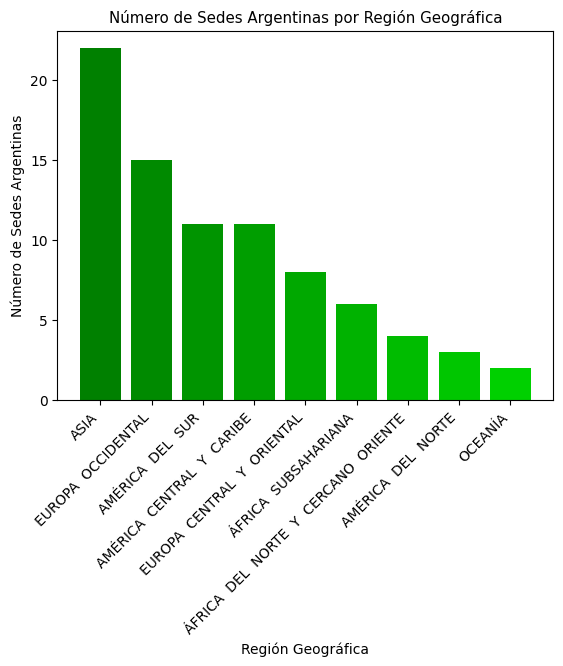

In [64]:
# Creamos el gráfico de barras
paleta_verde = ["#008000","#008A00","#009400","#009E00","#00A800","#00B200","#00BC00","#00C600","#00D000"]

fig, ax = plt.subplots()
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 9.0

# Graficar el diagrama de barras
ax.bar(data = reporte_2.sort_values(by='paises_con_sedes_en_Argentina', ascending=False),
       x='region_geografica', height='paises_con_sedes_en_Argentina', 
       color=paleta_verde)

# Añadimos etiquetas y título
ax.set_xlabel('Región Geográfica')  
ax.set_ylabel('Número de Sedes Argentinas')
ax.set_title('Número de Sedes Argentinas por Región Geográfica')

# Rotamos las etiquetas del eje x 
plt.xticks(rotation=45, ha='right')

<h2>2</h2>
<hr>

In [65]:
# tabla intermedia a usar en la siguiente consulta,
# obtiene el porcentaje de inversion 2018-22 por cada pais.
avg_inversion_pais = sql ^("""
                    SELECT pais, ROUND(AVG(inversion), 2) AS avg_inversion
                    FROM esquema_IED
                    GROUP BY pais
                    """)

In [66]:
consulta_boxplot = sql ^("""
                SELECT p.region_geografica, avg.avg_inversion AS promedio_inversiones
                FROM pais p INNER JOIN avg_inversion_pais avg
                ON p.iso3 = avg.pais
                WHERE p.iso3 IN (SELECT iso3_sede FROM sedes)
                """)

Calculemos la mediana de inversion para cada pais, esto servirá para ordenarlos.

In [67]:
medianas_region = {}
for region in consulta_boxplot["region_geografica"].unique():
    mediana = consulta_boxplot[consulta_boxplot["region_geografica"] == region]["promedio_inversiones"].median()
    medianas_region[region] = mediana

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'AMÉRICA  CENTRAL  Y  CARIBE'),
  Text(1, 0, 'ÁFRICA  DEL  NORTE  Y  CERCANO  ORIENTE'),
  Text(2, 0, 'ÁFRICA  SUBSAHARIANA'),
  Text(3, 0, 'AMÉRICA  DEL  SUR'),
  Text(4, 0, 'EUROPA  CENTRAL  Y  ORIENTAL'),
  Text(5, 0, 'EUROPA  OCCIDENTAL'),
  Text(6, 0, 'ASIA'),
  Text(7, 0, 'OCEANÍA'),
  Text(8, 0, 'AMÉRICA  DEL  NORTE')])

<Figure size 640x480 with 0 Axes>

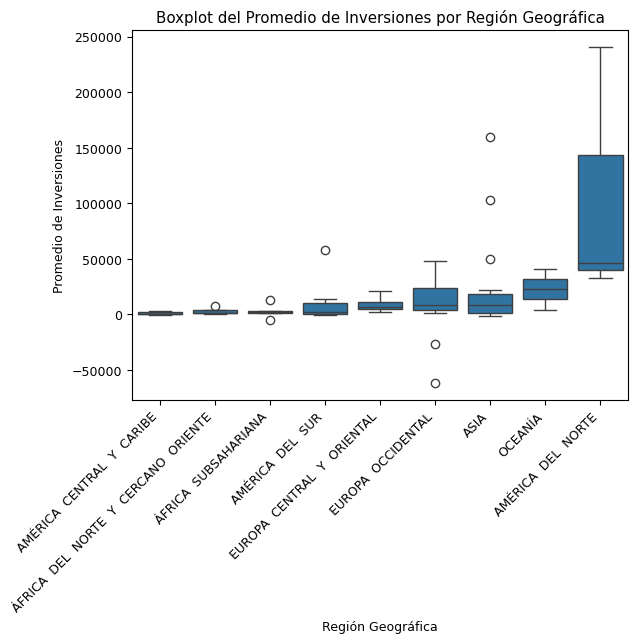

In [68]:
plt.clf()
fig, ax = plt.subplots()

ax = sns.boxplot(x="region_geografica", 
                 y="promedio_inversiones",  
                 data=consulta_boxplot,
                 order = sorted(medianas_region, key=medianas_region.get)
                 )

# Añadimos etiquetas y título
plt.xlabel('Región Geográfica')
plt.ylabel('Promedio de Inversiones')
plt.title('Boxplot del Promedio de Inversiones por Región Geográfica')

plt.xticks(rotation=45, ha='right')


[Text(0, 0, '86050.4'),
 Text(0, 0, '285057'),
 Text(0, 0, '23139.3'),
 Text(0, 0, '3838.75'),
 Text(0, 0, '17392.4'),
 Text(0, 0, '104459'),
 Text(0, 0, '35291.6'),
 Text(0, 0, '7023.58'),
 Text(0, 0, '21026.7')]

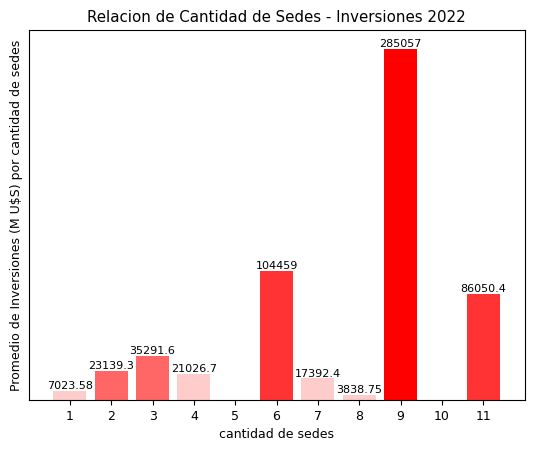

In [69]:
sedes_vs_inversion = sql^("""
        SELECT sedes, AVG(inversion_2022) AS promedio_de_inversiones
        FROM reporte_1
        GROUP BY sedes
            """)
            
sedes_vs_inversion = sedes_vs_inversion[(sedes_vs_inversion['promedio_de_inversiones'] > 0)]

fig, ax = plt.subplots()

q_95 = sedes_vs_inversion["promedio_de_inversiones"].quantile(0.95)
q_75 = sedes_vs_inversion["promedio_de_inversiones"].quantile(0.75)
q_50 = sedes_vs_inversion["promedio_de_inversiones"].quantile(0.50)
q_25 = sedes_vs_inversion["promedio_de_inversiones"].quantile(0.25)

def asignar_intensidad(avg):
    if avg >= q_95:
        return "#FF0000"
    elif avg >= q_75:
        return "#FF3333"
    elif avg >= q_50:
        return "#FF6666"
    else:
        return "#FFCCCC"

colores = [asignar_intensidad(avg) for avg in sedes_vs_inversion['promedio_de_inversiones']]

plt.rcParams['font.family'] = 'sans-serif'           


ax.bar(data=sedes_vs_inversion, x='sedes', height='promedio_de_inversiones', color = colores)
       
ax.set_title('Relacion de Cantidad de Sedes - Inversiones 2022')
ax.set_xlabel('cantidad de sedes', fontsize='medium')                       
ax.set_ylabel('Promedio de Inversiones (M U$S) por cantidad de sedes', fontsize='medium')    
ax.set_xlim(0, 12)
ax.set_ylim(0, max(sedes_vs_inversion["promedio_de_inversiones"] + 15000))

ax.set_xticks(range(1,12,1))               # Muestra todos los ticks del eje x
ax.set_yticks([])                          # Remueve los ticks del eje y
ax.bar_label(ax.containers[0], fontsize=8) 

Notamos que estó no nos da información tan util, se puede pensar en el principio de Pareto, pero todavía no se ve ninguna tendendcia.
Cambiemos un poco el gráfico para tomar intervalos de cantidad de sedes mejor.

In [ ]:
sedes_vs_inversion = sql^("""
        SELECT CASE WHEN sedes < 3 THEN '0-2'
                WHEN sedes >= 3 AND sedes < 6 THEN '3-5'
                WHEN sedes >= 6 AND sedes < 9 THEN '6-8'
                WHEN sedes >= 9 THEN '9-max'
                END AS sedes, 
                AVG(inversion_2022) AS promedio_de_inversiones
        FROM reporte_1
        GROUP BY sedes
        ORDER BY sedes
            """)
            
sedes_vs_inversion = sedes_vs_inversion[(sedes_vs_inversion['promedio_de_inversiones'] > 0)]

fig, ax = plt.subplots()

q_95 = sedes_vs_inversion["promedio_de_inversiones"].quantile(0.95)
q_75 = sedes_vs_inversion["promedio_de_inversiones"].quantile(0.75)
q_50 = sedes_vs_inversion["promedio_de_inversiones"].quantile(0.50)
q_25 = sedes_vs_inversion["promedio_de_inversiones"].quantile(0.25)

def asignar_intensidad(avg):
    if avg >= q_95:
        return "#FF0000"
    elif avg >= q_75:
        return "#FF3333"
    elif avg >= q_50:
        return "#FF6666"
    else:
        return "#FFCCCC"

colores = [asignar_intensidad(avg) for avg in sedes_vs_inversion['promedio_de_inversiones']]

plt.rcParams['font.family'] = 'sans-serif'           


ax.bar(data=sedes_vs_inversion, x='sedes', height='promedio_de_inversiones', color = colores)
       
ax.set_title('Relacion de Cantidad de Sedes - Inversiones 2022')
ax.set_xlabel('cantidad de sedes', fontsize='medium')                       
ax.set_ylabel('Promedio de Inversiones (M U$S) por cantidad de sedes', fontsize='medium')    
ax.set_ylim(0, max(sedes_vs_inversion["promedio_de_inversiones"] + 15000))

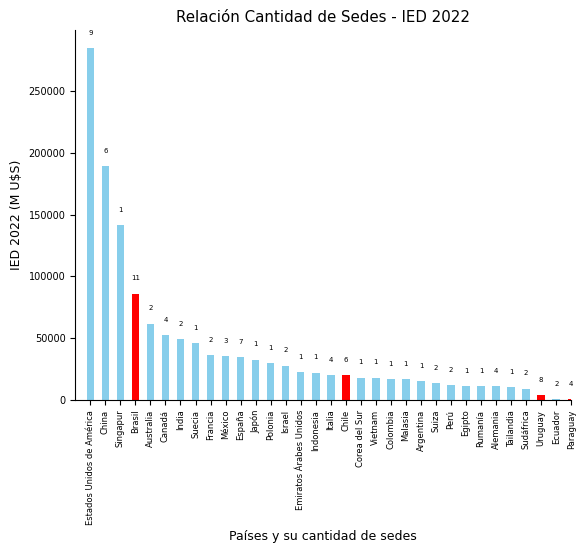

<Figure size 2800x2000 with 0 Axes>

In [70]:
# Filtramos los datos por numero de sedes e inversion
reporte_1_positivos = reporte_1[(reporte_1['inversion_2022'] > 0) & ((reporte_1['sedes'] >= 2) | (reporte_1['inversion_2022'] > 10000)) ]


# Ordenamos los datos por inversión en 2022 de forma descendente
reporte_1_sorted = reporte_1_positivos.sort_values(by='inversion_2022', ascending=False)

# Creamos el gráfico de barras
fig, ax = plt.subplots()

colores = ['red' if pais in ["Uruguay","Chile","Paraguay","Brasil","Bolivia"] else 'skyblue' for pais in reporte_1_sorted['País']]

ax.bar(data=reporte_1_sorted, x='País', height='inversion_2022', width=0.5, color = colores)

# Añadimos números de sedes como anotaciones en las barras
for i, (pais, inversion, sedes) in enumerate(zip(reporte_1_sorted['País'], reporte_1_sorted['inversion_2022'], reporte_1_sorted['sedes'])):
  ax.text(i, inversion + 10000, str(sedes), ha='center', va='bottom', rotation=0,  fontsize='5')

# Establecemos título y etiquetas
ax.set_title('Relación Cantidad de Sedes - IED 2022')
ax.set_xlabel('Países y su cantidad de sedes')
ax.set_ylabel('IED 2022 (M U$S)')
ax.set_xlim(-1, 11)

# Asignamos un tick a cada barra en el eje x
ax.set_xticks(range(len(reporte_1_sorted)))
ax.set_xticklabels(reporte_1_sorted['País'], rotation=90)

# Achicamos y rotamos ticks
plt.xticks(rotation=90)
plt.xticks(size=6)
ax.tick_params(axis='y', labelsize='7')

# Aumentamos un poco la calidad
plt.figure(figsize=(14, 10), dpi=200)


# Saco los bordes de arriba y la derecha
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)